In [ ]:
!pip install diffusers
!pip install transformers
!pip install accelerate

In [ ]:
from diffusers import DDPMScheduler, UNet2DModel

In [ ]:
modelName = "google/ddpm-cat-256"
#modelName = "google/ddpm-church-256"

In [ ]:
scheduler = DDPMScheduler.from_pretrained(modelName)
unet = UNet2DModel.from_pretrained(modelName).to('cuda')

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

In [ ]:
scheduler.set_timesteps(50)
#print(scheduler.config)
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [ ]:
import torch

batch_size = 1
sample_size = unet.config.sample_size
noise = torch.randn((batch_size,3,sample_size, sample_size)).to('cuda')


In [ ]:
input = noise

for t in scheduler.timesteps:
  with torch.no_grad():
    noise_residual = unet(input, t).sample
    previous_sample = scheduler.step(noise_residual, t, input).prev_sample
    input = previous_sample

In [ ]:
from PIL import Image
import numpy as np
images = (input/2 + 0.5).clamp(0,1)
images = images.cpu().permute(0,2,3,1).numpy()  # Pytorch(batch, ch, width, height), PIL(batch, width, height, ch)
images = (images*255).astype(np.uint8)
output = []
for i in range(batch_size):
  output.append(Image.fromarray(images[i]))

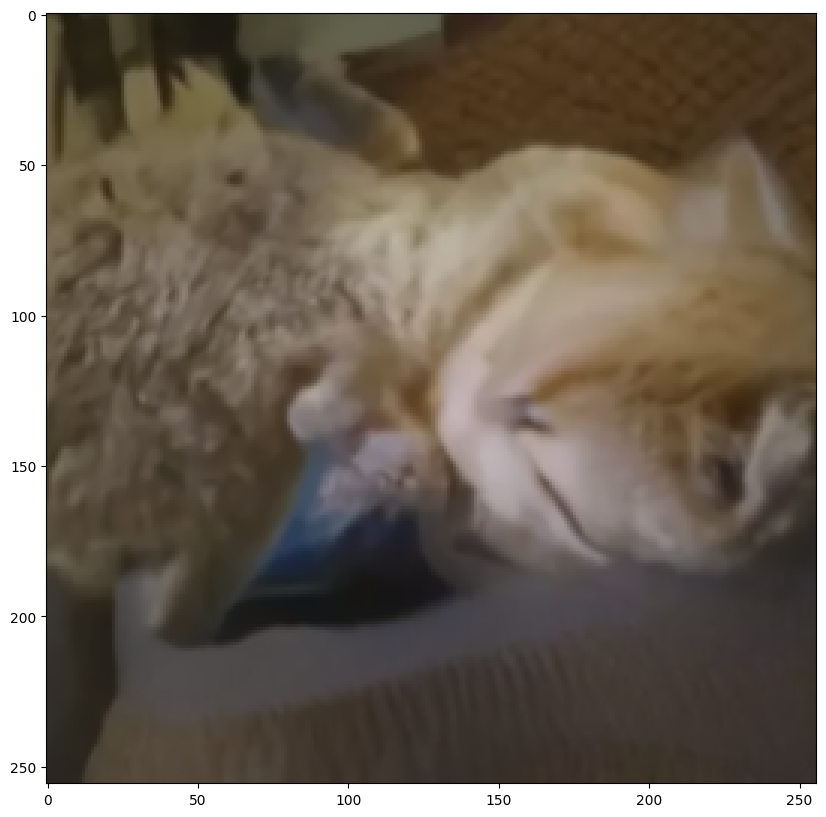

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for i in range(batch_size):
  plt.subplot(1, batch_size, i+1)
  plt.imshow(output[i])